# Exploratory Data Analysis in R
## Import the required packages

In [ ]:
library(httr)
library(jsonlite)
library(ggplot2)
library(tidyverse)
library(gapminder)

## Read in JSON data from Github

In [2]:
####### Loading data from Github #############
url = 'https://raw.githubusercontent.com/vega/vega/master/docs/data/gapminder.json'
connect <- GET(url)
if (connect$status_code!=200) {
  paste('Error - status code :',connect$status_code,sep=" ")
  } else {
    data <- fromJSON(url, flatten=TRUE)
  }

## View the Head of the Dataset & Subset

In [3]:
head(data)

year,country,cluster,pop,life_expect,fertility
1955,Afghanistan,0,8891209,30.332,7.7
1960,Afghanistan,0,9829450,31.997,7.7
1965,Afghanistan,0,10997885,34.020,7.7
1970,Afghanistan,0,12430623,36.088,7.7
1975,Afghanistan,0,14132019,38.438,7.7
1980,Afghanistan,0,15112149,39.854,7.8


In [4]:
# Subset to data about Afghanistan and attach for easier analysis
suppressMessages(attach(data[data$country=='Afghanistan',]))

## Plotting using Base Plot

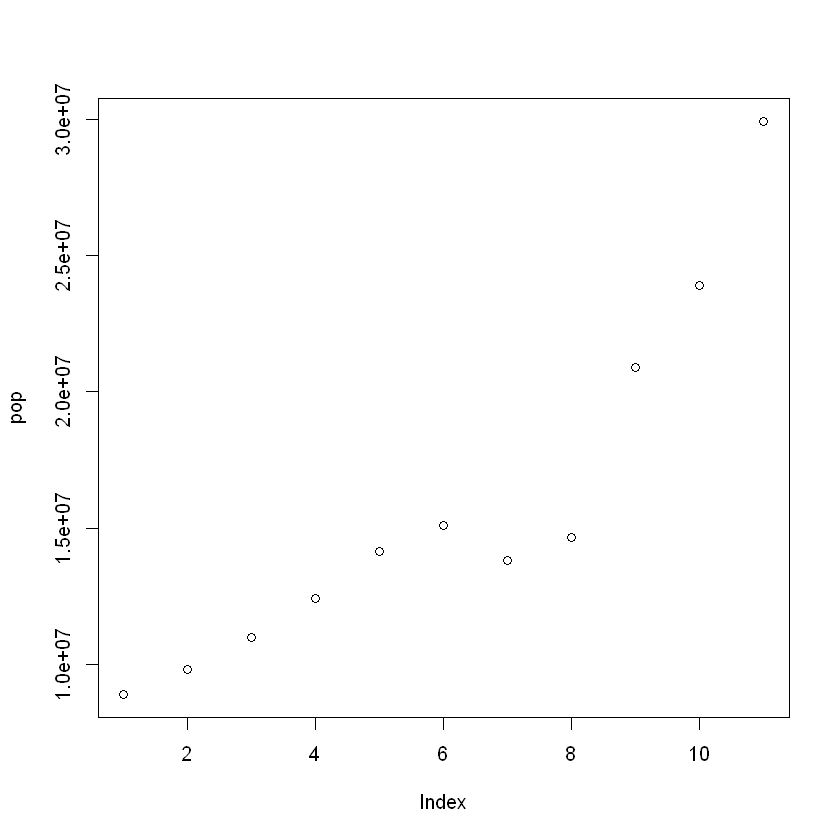

In [5]:
# Plot Afghanistan's Population Overtime
plot(pop)

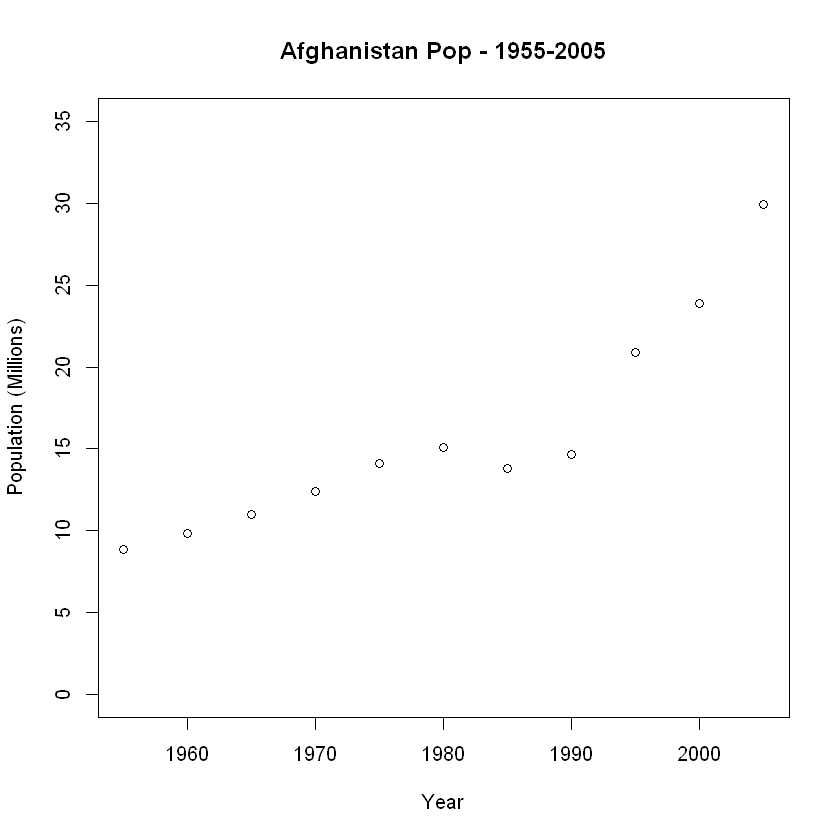

In [6]:
# Transform Axis & Add Axis Labels
plot(x=year,
     y=pop/1000000,
     main="Afghanistan Pop - 1955-2005",
     ylab="Population (Millions)",
     xlab='Year',
     ylim = c(0,35)
)

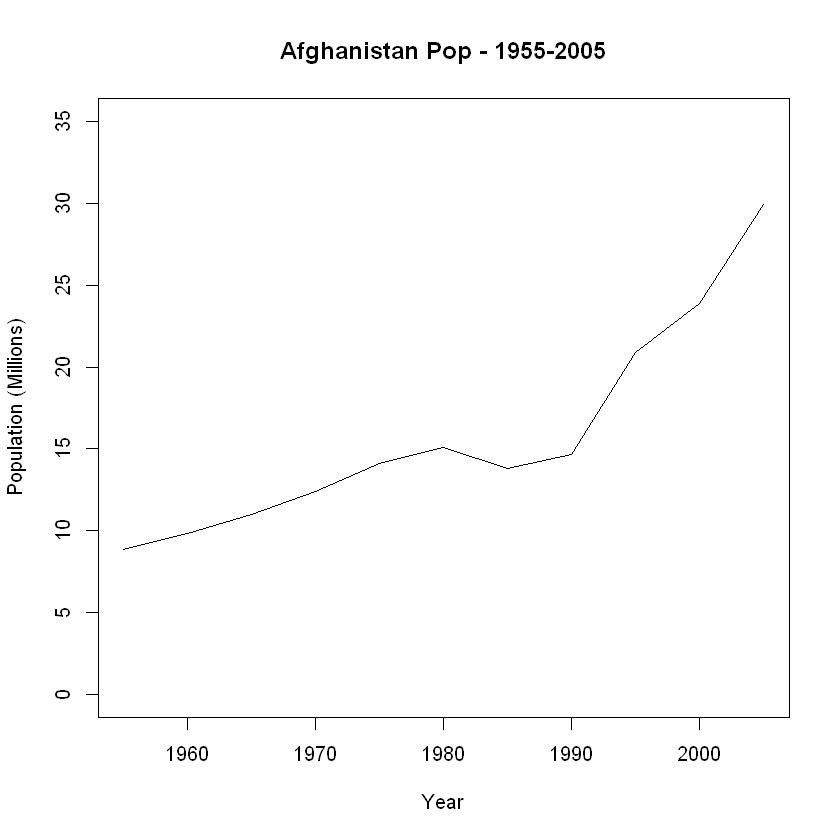

In [7]:
# Change Chart Type to Line
plot(x=year,
     y=pop/1000000,
     main="Afghanistan Pop - 1955-2005",
     ylab="Population (Millions)",
     xlab='Year',
     ylim = c(0,35),
     type='l'
)

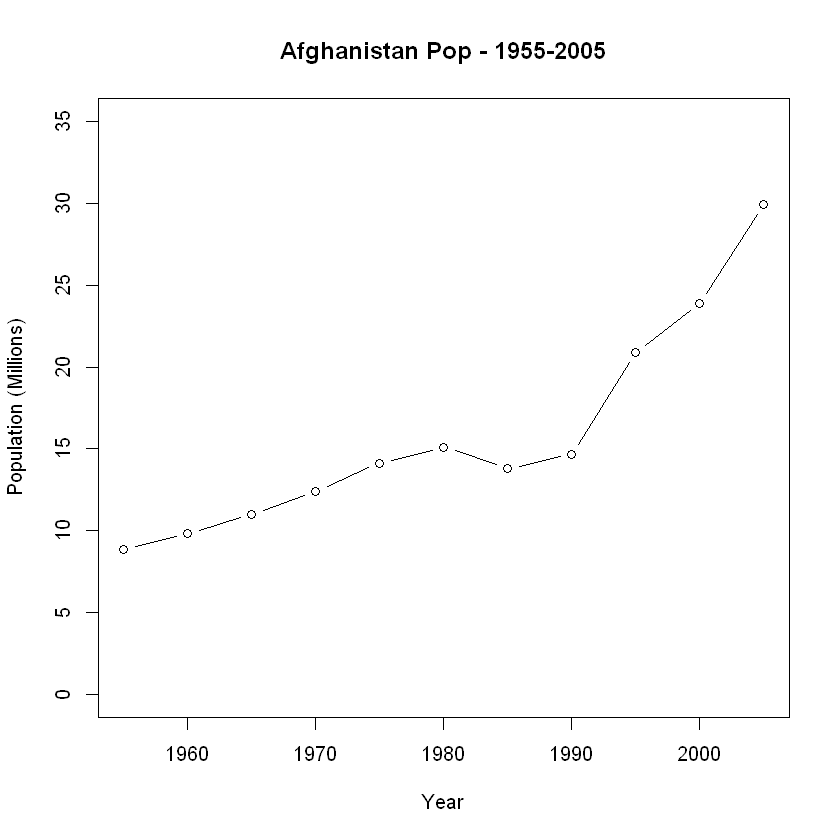

In [8]:
# Change Chart Type to Both
plot(x=year,
     y=pop/1000000,
     main="Afghanistan Pop - 1955-2005",
     ylab="Population (Millions)",
     xlab='Year',
     ylim = c(0,35),
     type='b'
)

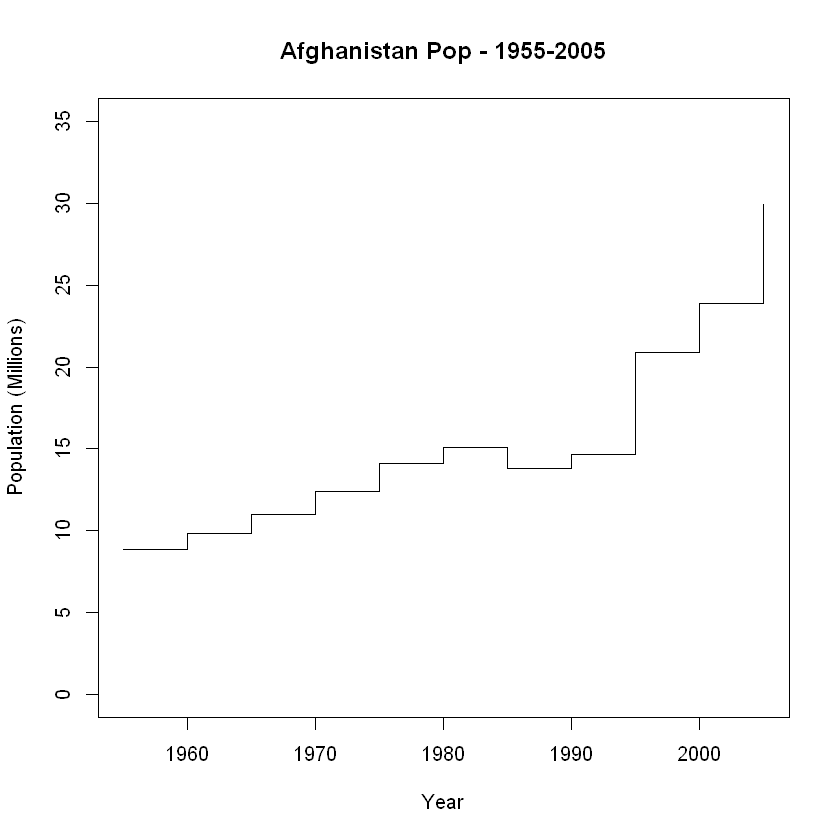

In [9]:
# Change Chart Type to Stair Step
plot(x=year,
     y=pop/1000000,
     main="Afghanistan Pop - 1955-2005",
     ylab="Population (Millions)",
     xlab='Year',
     ylim = c(0,35),
     type='s'
)

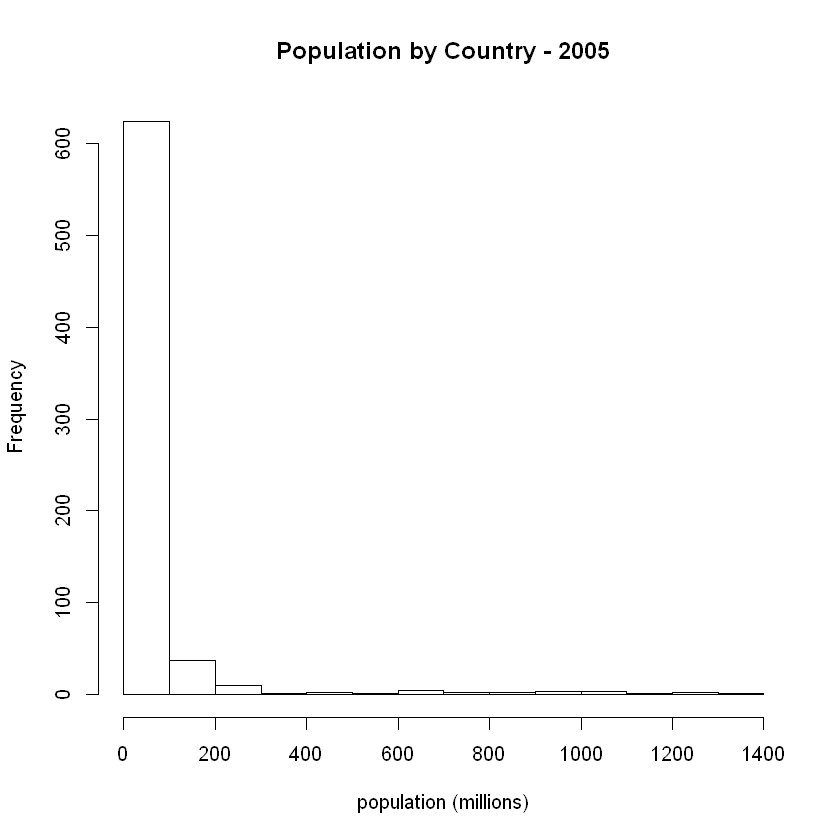

In [10]:
# Histogram

# Define dataset
suppressMessages(attach(data[data$year==2005,]))

# Define and print plot
hist(data$pop/1000000,
    main="Population by Country - 2005",
    xlab="population (millions)")

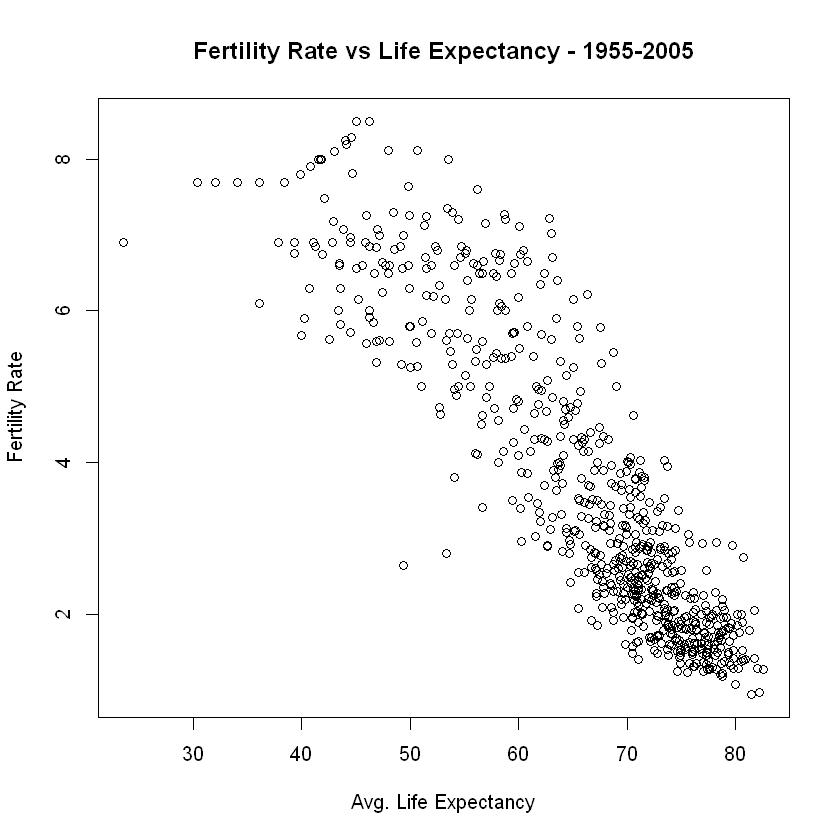

In [11]:
# Scatterplot

# Define dataset
suppressMessages(attach(data))

# Define and print plot
plot(x=life_expect, 
     y=fertility,
     main='Fertility Rate vs Life 	Expectancy - 1955-2005',
     xlab='Avg. Life Expectancy',
     ylab='Fertility Rate'
)

# Plotting using ggplot - qplot

## Scatterplot

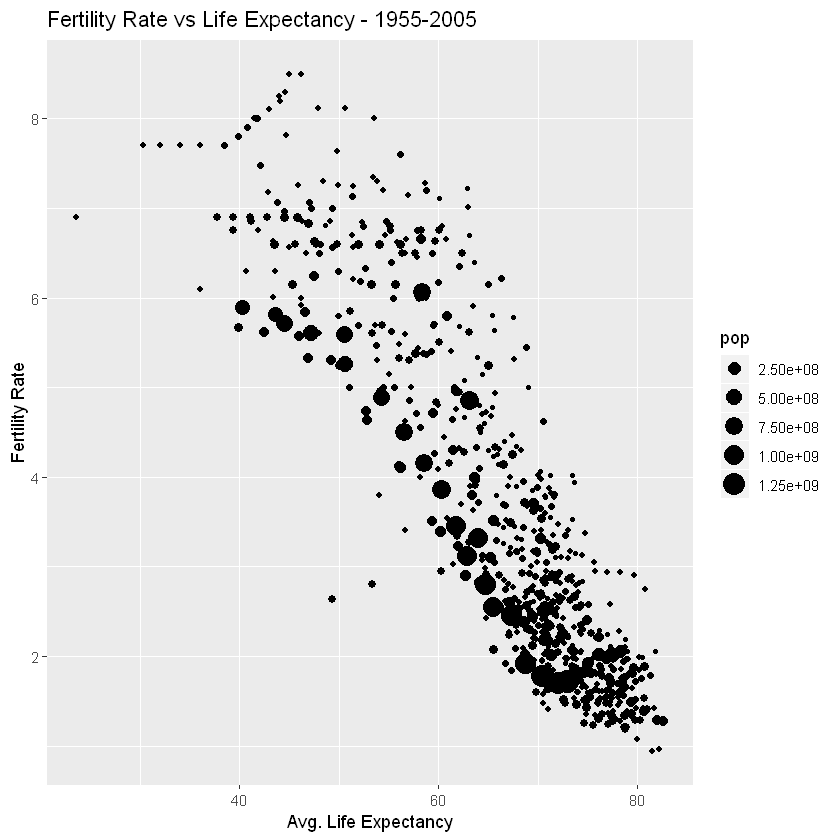

In [12]:
print(qplot(x=life_expect, 
            y=fertility,
            main='Fertility Rate vs Life Expectancy - 1955-2005',
            xlab='Avg. Life Expectancy',
            ylab='Fertility Rate',
            size = pop
))

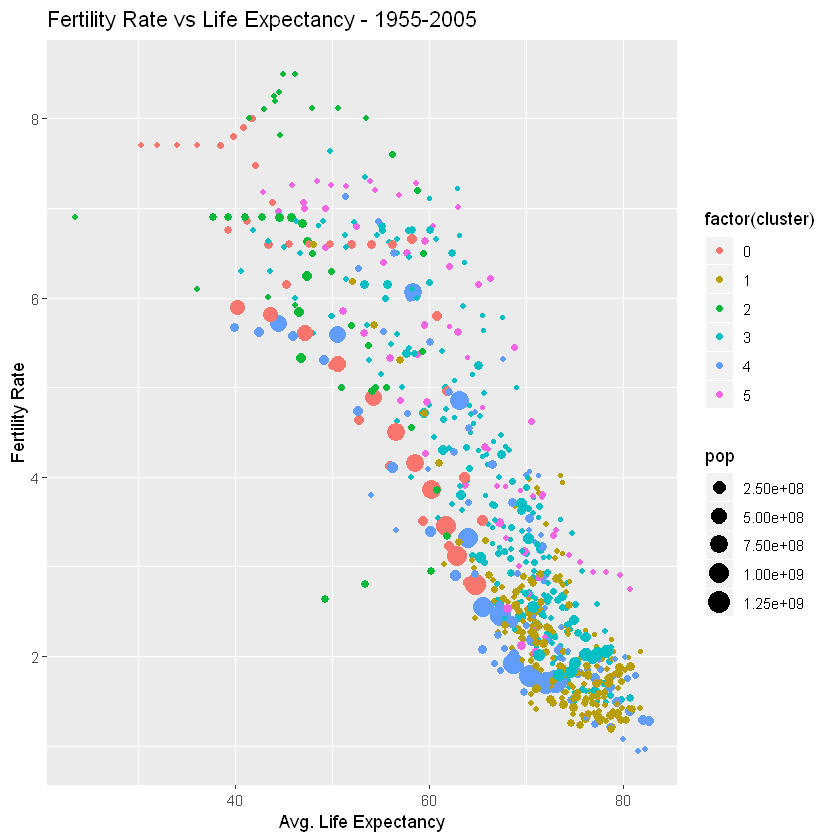

In [13]:
# Adding color by Country Grouping
print(qplot(x=life_expect, 
            y=fertility,
            main='Fertility Rate vs Life Expectancy - 1955-2005',
            xlab='Avg. Life Expectancy',
            ylab='Fertility Rate',
            size = pop,
            color=factor(cluster)
))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


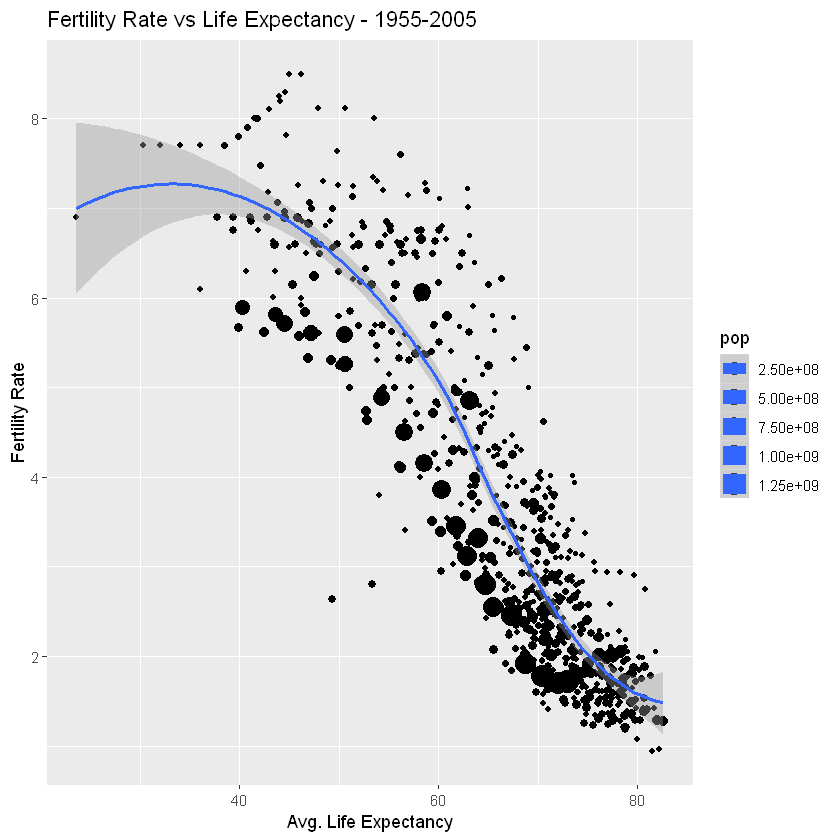

In [14]:
# Multiple Scatter plot with smoothing
print(qplot(x=life_expect, 
            y=fertility,
            main='Fertility Rate vs Life Expectancy - 1955-2005',
            xlab='Avg. Life Expectancy',
            ylab='Fertility Rate',
            size = pop,
            geom = c('point','smooth')
))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


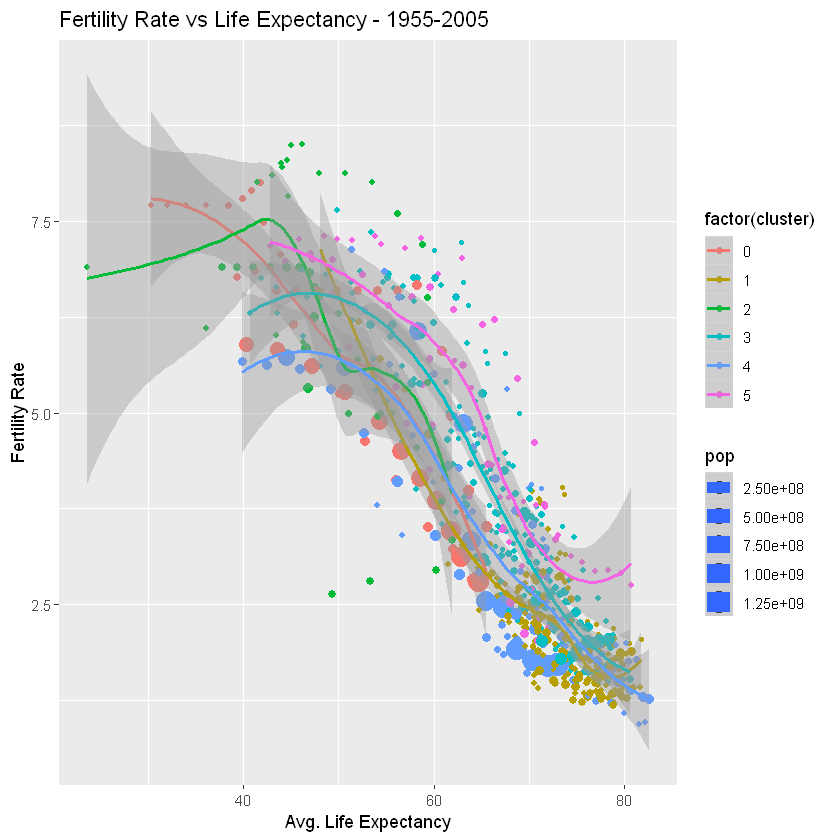

In [15]:
# Multiple Scatter plot with smoothing by cluster
print(qplot(x=life_expect, 
            y=fertility,
            main='Fertility Rate vs Life Expectancy - 1955-2005',
            xlab='Avg. Life Expectancy',
            ylab='Fertility Rate',
            size = pop,
            geom = c('point','smooth'),
            color = factor(cluster)
))

## Histogram

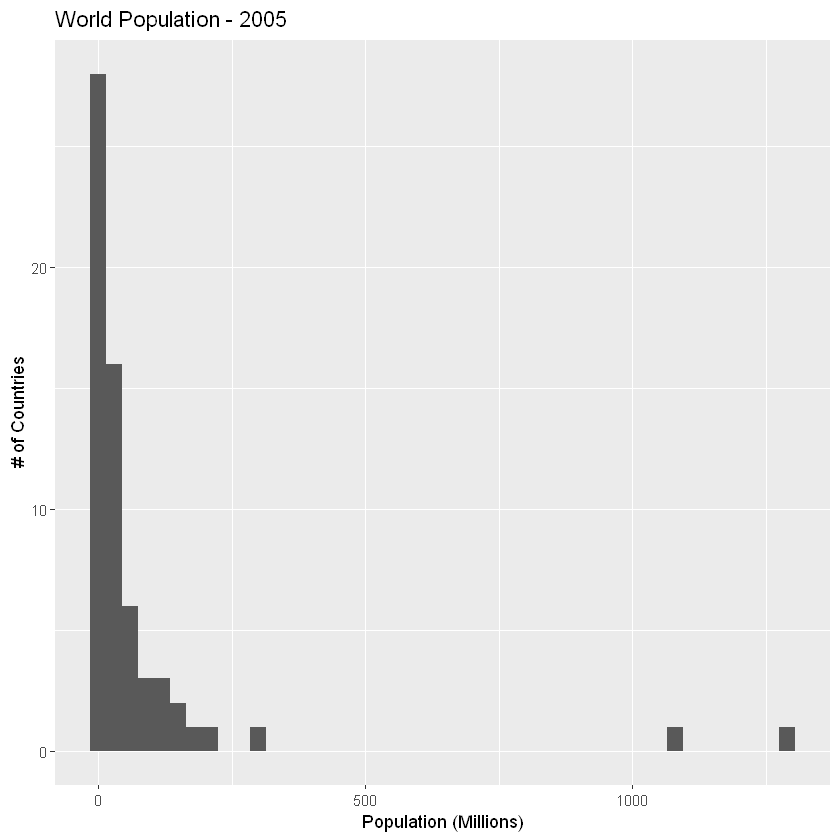

In [16]:
# Define dataset
suppressMessages(attach(data[data$year==2005,]))

# Histogram
print(qplot(x=pop/1000000,
            main='World Population - 2005',
            ylab='# of Countries',
            xlab='Population (Millions)',
            binwidth=30
))

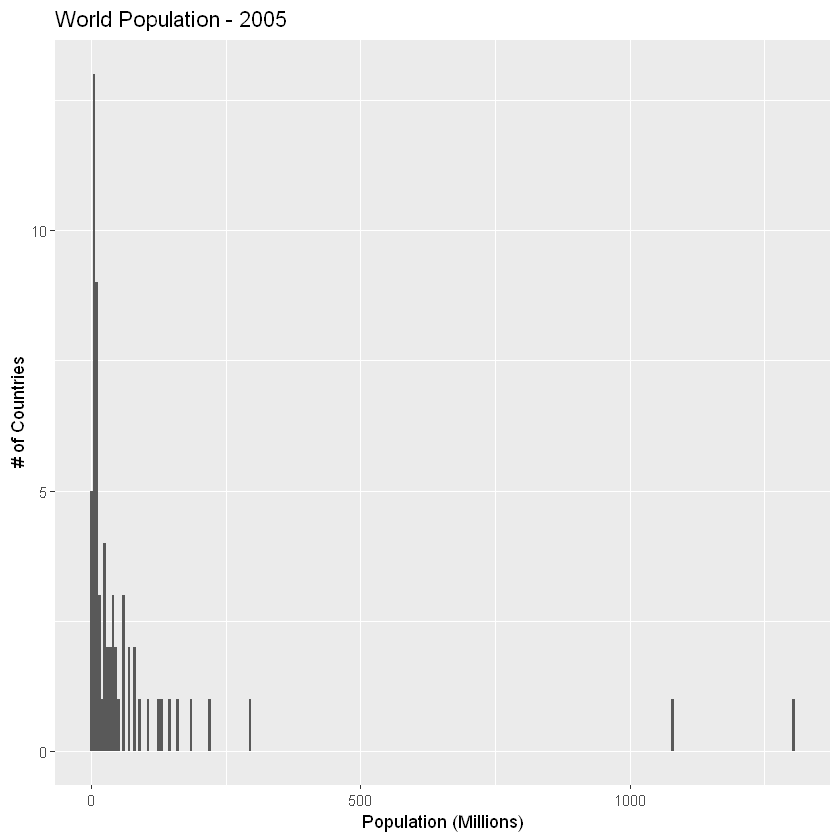

In [17]:
# Histogram with a lower binwidth
print(qplot(x=pop/1000000,
            main='World Population - 2005',
            ylab='# of Countries',
            xlab='Population (Millions)',
            binwidth = 5
))

## Dotplot

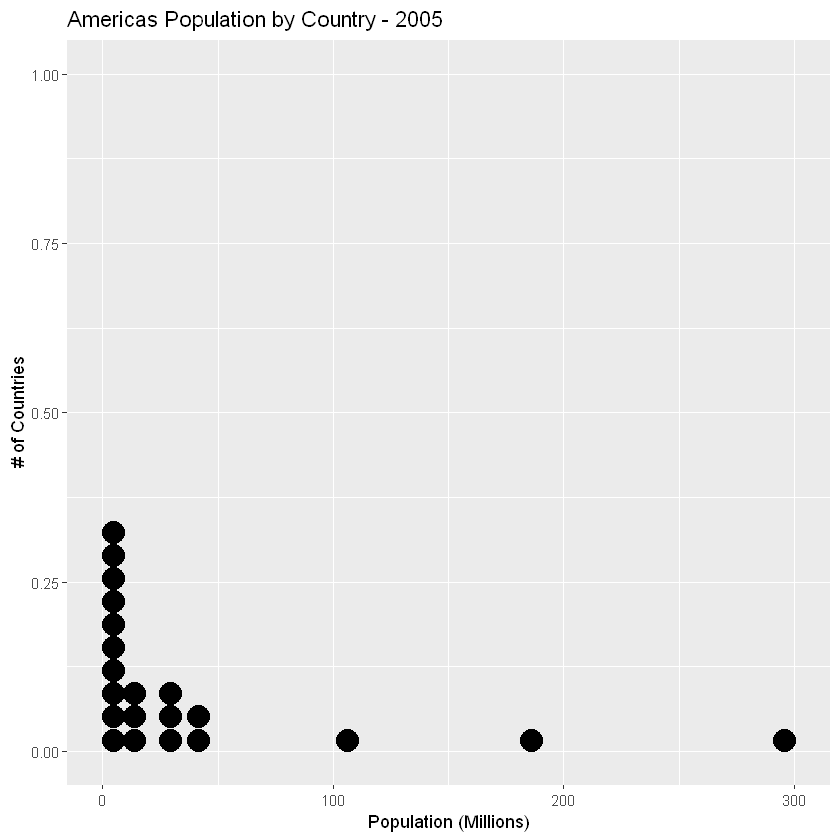

In [18]:
# Define Dataset
suppressMessages(attach(data[data$year==2005 & data$cluster==3,]))

# Print plot
print(qplot(x=pop/1000000,
            main='Americas Population by Country - 2005',
            ylab='# of Countries',
            xlab='Population (Millions)',
            geom='dotplot',
            dotsize = 1,
            binwidth = 10
))